In [253]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import locale
%matplotlib inline
import matplotlib.pyplot as plt

In [254]:
# загрузим и посмотрим на имеющиеся данные
data = pd.read_excel('data.xlsx')
data

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [255]:
# посмотрим на характеристики данных
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


,client_id,sum,Unnamed: 5
count,724.000000,724.000000,0.0
mean,183.084254,7162.542030,NaN
std,106.590761,6308.571297,NaN
min,6.000000,23.700000,NaN
25%,86.000000,3114.732500,NaN
50%,194.000000,5207.990000,NaN
75%,273.000000,8934.950000,NaN
max,398.000000,39713.500000,NaN


In [256]:
# удалим пустой столбец
del data['Unnamed: 5']

In [257]:
# заменим символ '-' на NaN (отсутствие значения) для снижения 'шума' при выполнении группировок
# изменим тип данных у столбцов client_id (на object) и receiving_date (на datetime64)
data = data.replace('-', np.nan)
data['client_id'] = data['client_id'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       724 non-null    object        
 1   sum             724 non-null    float64       
 2   status          730 non-null    object        
 3   sale            723 non-null    object        
 4   new/current     723 non-null    object        
 5   document        708 non-null    object        
 6   receiving_date  606 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 40.0+ KB


In [258]:
# создадим новый столбец month и для каждого поступления отразим в нем соотвествующий месяц
data['month'] = np.where((data['client_id'].isna()) & (~data['status'].isna()), data['status'], None)
data['month'] = data['month'].ffill()

# избавимся от неиформативных строк, содержащих только значения месяца
data = data[data['client_id'].notna()]

# для удобства проведения расчетов изменим тип данных столбца month на datetime
locale.setlocale(locale.LC_TIME, 'ru_RU')
data['month'] = pd.to_datetime(data['month'], format='%B %Y')
data

,client_id,sum,status,sale,new/current,document,receiving_date,month
1,6.0,11693.7,ВНУТРЕННИЙ,NaN,NaN,NaN,NaT,2021-05-01
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,2021-05-01
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021-05-01
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021-05-01
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,2021-05-01
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,2021-10-01
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT,2021-10-01
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT,2021-10-01
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,2021-10-01


#### 1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [259]:
july_revenue = data[(data['month'].dt.month == 7) & (data['month'].dt.year == 2021) & (data['status'] != 'ПРОСРОЧЕНО')]
print('Общая выручка за июль 2021:', july_revenue['sum'].sum().round(2))

Общая выручка за июль 2021: 859896.47


#### 2) Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.


In [260]:
# динамика выручки (с учетом просроченных платежей)
revenue_graf = data.groupby('month')['sum'].sum().reset_index().sort_values(by='month', ascending=True)
revenue_graf

,month,sum
0,2021-05-01,809572.19
1,2021-06-01,810266.11
2,2021-07-01,861874.17
3,2021-08-01,850435.79
4,2021-09-01,820383.78
5,2021-10-01,1033148.39


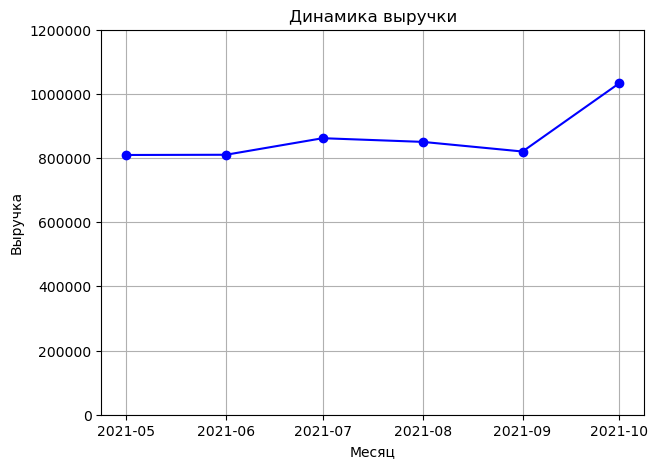

In [261]:
# построение графика
plt.figure(figsize=(7, 5))
plt.plot(revenue_graf['month'], revenue_graf['sum'], marker='o', linestyle='-', color='b')
plt.title('Динамика выручки')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(bottom=0, top=1200000)
plt.grid(True)
plt.show()

#### 3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [262]:
sale_revenue = data[(data['month'].dt.month == 9) & (data['month'].dt.year == 2021)]
sale_revenue.groupby('sale')['sum'].sum().sort_values(ascending=False).reset_index().head(1)

,sale,sum
0,Смирнов,221525.7


#### 4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?


In [263]:
# количество сделок в октябре 2021
new_current = data[(data['month'].dt.month == 10) & (data['month'].dt.year == 2021)]
new_current['new/current'].value_counts().reset_index().rename(columns={'index': 'Сделка', 'new/current': 'Количество сделок'})

,Сделка,Количество сделок
0,текущая,99
1,новая,36


#### 5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [264]:
# количество полученных оригиналов в июне 2021 по майским сделкам
sale_data = data[(data['month'].dt.month == 5) & (data['month'].dt.year == 2021)
& (data['receiving_date'].dt.month == 6) & (data['receiving_date'].dt.year == 2021)]
sale_data['document'].value_counts()

оригинал    76
Name: document, dtype: int64

#### ЗАДАНИЕ

In [265]:
# создадим новый столбец bonus и внесем в него данные согласно условиям
data.loc[(data['new/current'] == 'новая') & (data['status'] == 'ОПЛАЧЕНО') &
(data['document'] == 'оригинал'), 'bonus'] = data['sum'] * 0.07

In [266]:
data.loc[(data['new/current'] == 'текущая') & (data['status'] != 'ПРОСРОЧЕНО') & 
(data['document'] == 'оригинал') & (data['sum'] > 10000), 'bonus'] = data['sum'] * 0.05

In [267]:
data.loc[(data['new/current'] == 'текущая') & (data['status'] != 'ПРОСРОЧЕНО') & (data['document'] == 'оригинал') 
& (data['sum'] <= 10000), 'bonus'] = data['sum'] * 0.03

In [268]:
# остаток по выплате бонусов менеджерам на 01.07.2021
data[(data['receiving_date'] >= '2021-07-01') 
     & (data['month'] < '2021-07-01')].groupby('sale')['bonus'].sum().round(2).sort_values(ascending=False).reset_index()

,sale,bonus
0,Петрова,10770.75
1,Смирнов,6430.26
2,Иванов,5991.45
3,Селиванов,5297.69
4,Кузнецова,4496.95
5,Андреев,3945.83
6,Филимонова,2317.96
7,Васильев,1037.05
8,Соколов,269.21
